# **Importing Dataset**

In [ ]:
#Uploading a file
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


## **Importing Modules**

In [ ]:
#Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from scipy.sparse import coo_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## **Understanding the Data**

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.head(5)

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


In [ ]:
df.shape   #1827 datapoints and 16 features

(1827, 16)

In [ ]:
df.describe()

,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
count,1823.000000,62.000000,1827.000000,0.0,1827.000000,1827.000000,1822.000000,1809.000000,1823.000000,1809.000000,551.0,39.0,861.0
mean,1.675710,1404.854839,0.035720,NaN,76.498632,58.120416,254.143798,256.428966,9.062095,14.721669,1.0,1.0,1.0
std,0.909434,350.813754,0.189859,NaN,9.133929,7.223756,54.756284,55.571902,2.016827,3.622257,0.0,0.0,0.0
min,0.000000,103.000000,0.000000,NaN,52.000000,38.000000,10.000000,10.000000,2.900000,6.000000,1.0,1.0,1.0
25%,1.120000,1337.500000,0.000000,NaN,70.000000,53.000000,260.000000,270.000000,8.100000,12.100000,1.0,1.0,1.0
50%,1.570000,1442.500000,0.000000,NaN,76.000000,58.000000,270.000000,270.000000,8.900000,14.100000,1.0,1.0,1.0
75%,2.010000,1545.000000,0.000000,NaN,83.000000,64.000000,270.000000,280.000000,10.100000,16.100000,1.0,1.0,1.0
max,8.050000,2314.000000,2.670000,NaN,111.000000,79.000000,360.000000,360.000000,21.000000,34.000000,1.0,1.0,1.0


In [ ]:
df.info()
# df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1827 non-null   object 
 1   NAME     1827 non-null   object 
 2   DATE     1827 non-null   object 
 3   AWND     1823 non-null   float64
 4   PGTM     62 non-null     float64
 5   PRCP     1827 non-null   float64
 6   TAVG     0 non-null      float64
 7   TMAX     1827 non-null   int64  
 8   TMIN     1827 non-null   int64  
 9   WDF2     1822 non-null   float64
 10  WDF5     1809 non-null   float64
 11  WSF2     1823 non-null   float64
 12  WSF5     1809 non-null   float64
 13  WT01     551 non-null    float64
 14  WT02     39 non-null     float64
 15  WT08     861 non-null    float64
dtypes: float64(11), int64(2), object(3)
memory usage: 228.5+ KB


In [ ]:
#Number of null values
no_null=df.isna().sum()
no_null

STATION       0
NAME          0
DATE          0
AWND          4
PGTM       1765
PRCP          0
TAVG       1827
TMAX          0
TMIN          0
WDF2          5
WDF5         18
WSF2          4
WSF5         18
WT01       1276
WT02       1788
WT08        966
dtype: int64

In [ ]:
#There are a lot of null values that needs to be handelled here ,NaaaaN


In [ ]:
df['STATION'].value_counts()    #Redundant column, can drop

USW00093134    1827
Name: STATION, dtype: int64

In [ ]:
df['NAME'].value_counts()      #Redundant column, can drop

LOS ANGELES DOWNTOWN USC, CA US    1827
Name: NAME, dtype: int64

In [ ]:
df['DATE'].value_counts()     #Very random column, I feel can be dropped too

2016-01-01    1
2019-05-12    1
2019-05-10    1
2019-05-09    1
2019-05-08    1
             ..
2017-08-28    1
2017-08-27    1
2017-08-26    1
2017-08-25    1
2020-12-31    1
Name: DATE, Length: 1827, dtype: int64

# **Data Cleaning and RE-sampling**

In [ ]:
def avg_temp(min_temp,max_temp):
  return (min_temp+max_temp)/2

In [ ]:
df['TAVG']=(avg_temp(df['TMAX'],df['TMIN']))    #Filling the average temperature column

In [ ]:
df.head(5)

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,53.5,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,56.0,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,53.0,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,62.0,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,54.0,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


In [ ]:
df['PRCP']=df['PRCP'].apply(lambda x: 1 if x>0 else x)

In [ ]:
df["PRCP"].value_counts()                 #The class is very imbalanced

0.0    1660
1.0     167
Name: PRCP, dtype: int64

In [ ]:
df.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.0,53.5,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.0,56.0,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.0,53.0,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,1.0,62.0,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.0,54.0,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


In [ ]:
#Number of null values
no_null=df.isna().sum()
no_null

STATION       0
NAME          0
DATE          0
AWND          4
PGTM       1765
PRCP          0
TAVG          0
TMAX          0
TMIN          0
WDF2          5
WDF5         18
WSF2          4
WSF5         18
WT01       1276
WT02       1788
WT08        966
dtype: int64

In [ ]:
#Resampling the data

In [ ]:
XX = df.drop(["PRCP",'STATION','NAME','DATE'], axis=1)

In [ ]:
XX.shape

(1827, 12)

In [ ]:
yy = df["PRCP"]


In [ ]:
yy.shape

(1827,)

In [ ]:
yy.value_counts()

0.0    1660
1.0     167
Name: PRCP, dtype: int64

In [ ]:

X_sparse = coo_matrix(XX)

In [ ]:
XX = XX.astype(float)
yy = yy.astype(int)

In [ ]:

X, X_sparse, y = resample(XX, X_sparse, yy, random_state=0)

In [ ]:
y.value_counts()

0    1651
1     176
Name: PRCP, dtype: int64

In [ ]:
X.head()

,AWND,PGTM,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
684,0.67,NaN,67.5,79.0,56.0,260.0,280.0,6.9,11.0,NaN,NaN,1.0
559,2.01,NaN,74.5,83.0,66.0,270.0,280.0,10.1,17.0,1.0,NaN,1.0
1653,1.79,NaN,77.5,90.0,65.0,260.0,270.0,10.1,18.1,NaN,NaN,NaN
1216,2.24,NaN,62.0,70.0,54.0,270.0,280.0,10.1,18.1,NaN,NaN,NaN
835,0.89,NaN,67.0,79.0,55.0,280.0,260.0,8.9,13.0,NaN,NaN,NaN


In [ ]:
X.describe()

,AWND,PGTM,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
count,1820.000000,67.000000,1827.000000,1827.000000,1827.000000,1823.000000,1809.000000,1823.000000,1809.000000,512.0,31.0,848.0
mean,1.673676,1495.417910,67.294745,76.425835,58.163656,253.296764,256.042012,9.090839,14.768988,1.0,1.0,1.0
std,0.887441,374.501331,7.507537,9.043182,7.098280,55.451873,55.920796,2.017897,3.532082,0.0,0.0,0.0
min,0.000000,103.000000,49.500000,56.000000,41.000000,10.000000,10.000000,2.900000,6.000000,1.0,1.0,1.0
25%,1.120000,1410.000000,62.000000,70.000000,53.000000,260.000000,260.000000,8.100000,13.000000,1.0,1.0,1.0
50%,1.570000,1503.000000,67.000000,76.000000,58.000000,270.000000,270.000000,8.900000,14.100000,1.0,1.0,1.0
75%,2.010000,1617.000000,73.000000,83.000000,64.000000,270.000000,280.000000,10.100000,16.100000,1.0,1.0,1.0
max,7.160000,2314.000000,88.500000,108.000000,76.000000,360.000000,360.000000,21.000000,34.000000,1.0,1.0,1.0


In [ ]:
n=X.isna().sum()    #Have to drop PGTM,WT01,WT02,WT08 as too many null values
n

AWND       7
PGTM    1760
TAVG       0
TMAX       0
TMIN       0
WDF2       4
WDF5      18
WSF2       4
WSF5      18
WT01    1315
WT02    1796
WT08     979
dtype: int64

In [ ]:
X= X.drop(["PGTM","WT01","WT02","WT08"], axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 684 to 350
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AWND    1820 non-null   float64
 1   TAVG    1827 non-null   float64
 2   TMAX    1827 non-null   float64
 3   TMIN    1827 non-null   float64
 4   WDF2    1823 non-null   float64
 5   WDF5    1809 non-null   float64
 6   WSF2    1823 non-null   float64
 7   WSF5    1809 non-null   float64
dtypes: float64(8)
memory usage: 128.5 KB


In [ ]:
n=X.isna().sum()
n

AWND     7
TAVG     0
TMAX     0
TMIN     0
WDF2     4
WDF5    18
WSF2     4
WSF5    18
dtype: int64

In [ ]:
X.head(5)

,AWND,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
684,0.67,67.5,79.0,56.0,260.0,280.0,6.9,11.0
559,2.01,74.5,83.0,66.0,270.0,280.0,10.1,17.0
1653,1.79,77.5,90.0,65.0,260.0,270.0,10.1,18.1
1216,2.24,62.0,70.0,54.0,270.0,280.0,10.1,18.1
835,0.89,67.0,79.0,55.0,280.0,260.0,8.9,13.0


In [ ]:
mode_value = X['AWND'].mode()[0]

In [ ]:
X['AWND'].fillna(mode_value, inplace=True)

In [ ]:
X['AWND'].isna().sum()      #All null values sorted

0

In [ ]:
mode_value = X['WDF2'].mode()[0]
X['WDF2'].fillna(mode_value, inplace=True)

In [ ]:
mode_value = X['WDF5'].mode()[0]
X['WDF5'].fillna(mode_value, inplace=True)

In [ ]:
mode_value = X['WSF2'].mode()[0]
X['WSF2'].fillna(mode_value, inplace=True)

In [ ]:
mode_value = X['WSF5'].mode()[0]
X['WSF5'].fillna(mode_value, inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 684 to 350
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AWND    1827 non-null   float64
 1   TAVG    1827 non-null   float64
 2   TMAX    1827 non-null   float64
 3   TMIN    1827 non-null   float64
 4   WDF2    1827 non-null   float64
 5   WDF5    1827 non-null   float64
 6   WSF2    1827 non-null   float64
 7   WSF5    1827 non-null   float64
dtypes: float64(8)
memory usage: 128.5 KB


In [ ]:
#Using SMOTE to resample


sm = SMOTE()
X, y = sm.fit_resample(X, y)


In [ ]:
X.shape

(3302, 8)

In [ ]:
y.shape

(3302,)

In [ ]:
y.value_counts()

0    1651
1    1651
Name: PRCP, dtype: int64

# **Standardizing Data and Feature Selection**

In [ ]:
#  So high Chi-Square value indicates that the hypothesis of independence is incorrect. In simple words, higher the
#  Chi-Square value the feature is more dependent on the response and
#  it can be selected for model training.

In [ ]:
X.head(5)

,AWND,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,0.67,67.5,79.0,56.0,260.0,280.0,6.9,11.0
1,2.01,74.5,83.0,66.0,270.0,280.0,10.1,17.0
2,1.79,77.5,90.0,65.0,260.0,270.0,10.1,18.1
3,2.24,62.0,70.0,54.0,270.0,280.0,10.1,18.1
4,0.89,67.0,79.0,55.0,280.0,260.0,8.9,13.0


In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
chi_scores = chi2(X,y)

In [ ]:
chi_scores

(array([  250.46074628,   729.98462484,  1505.92299077,   191.87762857,
        11296.27312028, 12733.90526681,    57.36616325,   152.87879521]),
 array([2.06059765e-056, 9.02699228e-161, 0.00000000e+000, 1.23735869e-043,
        0.00000000e+000, 0.00000000e+000, 3.61777979e-014, 4.07157184e-035]))

In [ ]:
# here first array represents chi square values and second array represnts p-values

In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<Axes: >

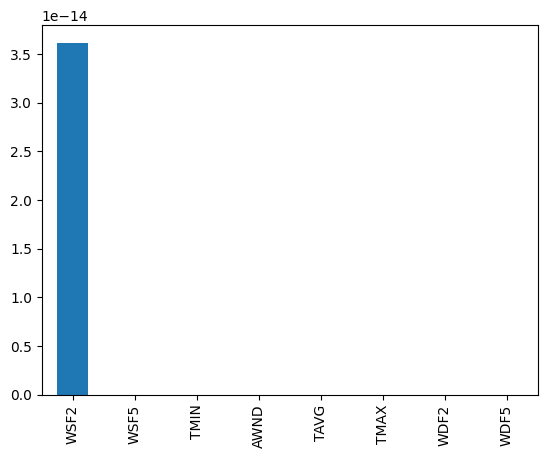

In [ ]:
p_values.plot.bar()

In [ ]:
# Since WSF2 has higher the p-value, it says that this variables is
#  independent of the repsone and can not be considered for model training

In [ ]:
#We will try both , by dropping it and also by not droppoing it

In [ ]:
X.head(5)

,AWND,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,0.67,67.5,79.0,56.0,260.0,280.0,6.9,11.0
1,2.01,74.5,83.0,66.0,270.0,280.0,10.1,17.0
2,1.79,77.5,90.0,65.0,260.0,270.0,10.1,18.1
3,2.24,62.0,70.0,54.0,270.0,280.0,10.1,18.1
4,0.89,67.0,79.0,55.0,280.0,260.0,8.9,13.0


In [ ]:
X= X.drop(["WSF2"], axis=1)

In [ ]:
scaler = StandardScaler()
Xx=scaler.fit_transform(X)

In [ ]:
Xx = pd.DataFrame(Xx)

In [ ]:
Xx.head(5)

,0,1,2,3,4,5,6
0,-1.216787,0.449149,0.786295,-0.115513,0.396685,0.632822,-1.202436
1,0.020198,1.424927,1.225313,1.488940,0.531344,0.632822,0.425980
2,-0.182889,1.843117,1.993595,1.328495,0.396685,0.501708,0.724523
3,0.232517,-0.317534,-0.201495,-0.436404,0.531344,0.632822,0.724523
4,-1.013700,0.379450,0.786295,-0.275958,0.666002,0.370594,-0.659631


In [ ]:
X.head()

,AWND,TAVG,TMAX,TMIN,WDF2,WDF5,WSF5
0,0.67,67.5,79.0,56.0,260.0,280.0,11.0
1,2.01,74.5,83.0,66.0,270.0,280.0,17.0
2,1.79,77.5,90.0,65.0,260.0,270.0,18.1
3,2.24,62.0,70.0,54.0,270.0,280.0,18.1
4,0.89,67.0,79.0,55.0,280.0,260.0,13.0


# **Training the model**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    Xx, y, stratify=y, train_size=0.8, random_state=123
)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve, ConfusionMatrixDisplay, accuracy_score

**LogesticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR = LogisticRegression(random_state=123)

In [ ]:
model_LR.fit(X_train,y_train)

LogisticRegression(random_state=123)

In [ ]:
y_predict_LR=model_LR.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict_LR)

0.8184568835098336

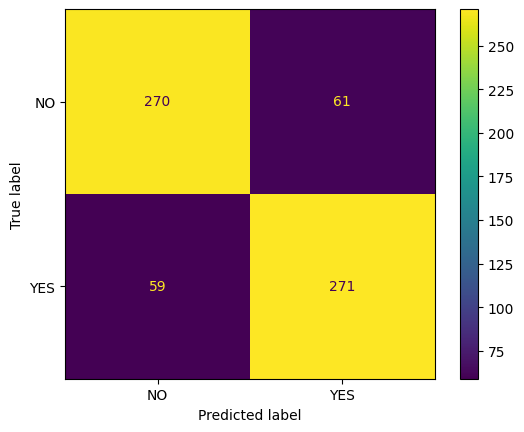

In [ ]:
from sklearn import metrics
a = {'NO': 0, 'YES': 1}
list(a.keys())
cm = confusion_matrix(y_test,y_predict_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(a.keys()))
disp.plot()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_RF=RandomForestClassifier(random_state=12)

In [ ]:
model_RF.fit(X_train,y_train)

RandomForestClassifier(random_state=12)

In [ ]:
y_predict_RF=model_RF.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict_RF)

0.972768532526475

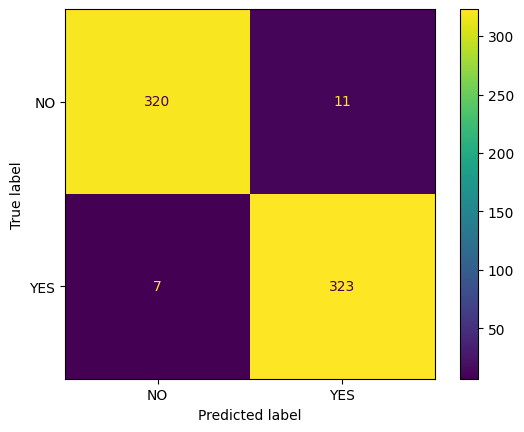

In [ ]:
from sklearn import metrics
a = {'NO': 0, 'YES': 1}
list(a.keys())
cm = confusion_matrix(y_test,y_predict_RF)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(a.keys()))
disp.plot()

**XG BOOT**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
 learning_rate=0.1,
 n_estimators=250,
 max_depth=8,
 min_child_weight=1,
 gamma=0,
 subsample=0.9,
 n_jobs=-1,
)

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_predict_XGB = xgb.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict_XGB)

0.9803328290468987

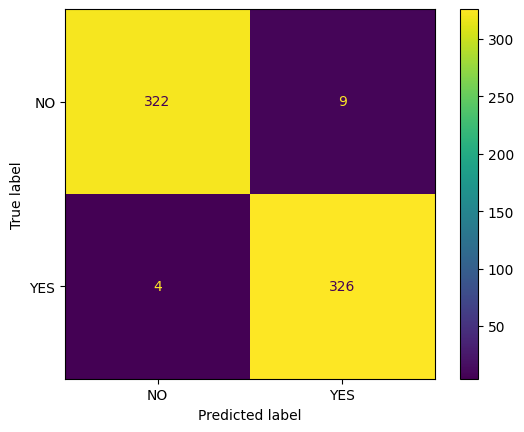

In [ ]:
from sklearn import metrics
a = {'NO': 0, 'YES': 1}
list(a.keys())
cm = confusion_matrix(y_test,y_predict_XGB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(a.keys()))
disp.plot()

**ROC/AUC**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_LR, tpr_LR, _ = roc_curve(y_test, y_predict_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)


In [ ]:
  fpr_RF, tpr_RF, _ = roc_curve(y_test, y_predict_RF)
  roc_auc_RF = auc(fpr_RF, tpr_RF)


In [ ]:
fpr_XGB, tpr_XGB, _ = roc_curve(y_test, y_predict_XGB)
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)


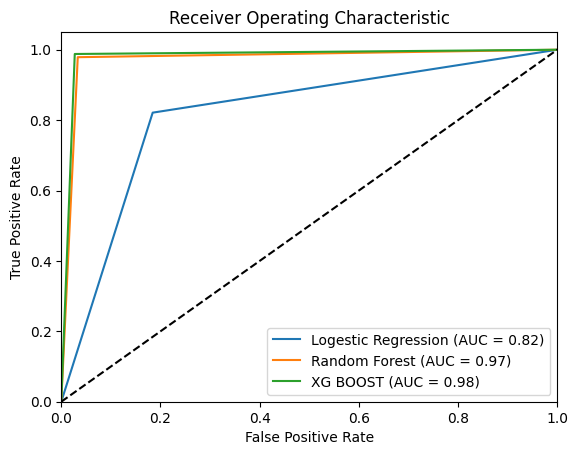

In [ ]:
plt.figure()
plt.plot(fpr_LR, tpr_LR, label='Logestic Regression (AUC = %0.2f)' % roc_auc_LR)
plt.plot(fpr_RF, tpr_RF, label='Random Forest (AUC = %0.2f)' % roc_auc_RF)
plt.plot(fpr_XGB, tpr_XGB, label='XG BOOST (AUC = %0.2f)' % roc_auc_XGB)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [1]:
import pandas as pd
